Домашнее задание

1. Загрузите датасет для бинарной или многоклассовой классификации:
  - Пример: **обзоры фильмов** с разметкой тональности в формате *.csv

2. Выполните препроцессинг:
  - **Чистка данных** методами NLP (регулярки, удаление стоп-слов и т.д.) и Data Science (удаление пустых строк с помощью `pd.dropna()`)
  - **Токенизация + векторизация** (преобразование текстов к виду числовых представлений), например, с помощью токенизатора TensorFlow/Keras или PyTorch
  - **Паддинг/усечение** (транкейшн) текстовых последовательностей
  - **Разделение датасета** на обучающую, проверочную и тестовую выборки

3. Постройте модель CNN:
  - Добавьте входной слой
  - Добавьте слои свертки и пулинга
  - Настройте размер ядра свертки
  - Добавьте полносвязные слой
  - Настройте функции активации для промежуточных и выходных слоев
  
4. Скомпилируйте модель:
  - Настройте функцию потерь, оптимизатор укажите метрики оценки для валидации модели в процессе обучения

5. Обучите модель:
 - Введите данные в модель
 - Добавьте отслеживание потерь/точности обучения

6. Оцените модель:
 - Проверьте модель на тестовом наборе
 - Вычислите метрики оценки (например, полноту, точность, F1-меру)
 - Выполните визуализацию результатов (например, с помощью матрицы ошибок)

7. Произведите настройку параметров
  - Добавьте комментарии: какие настройки вы изменили и почему? Обоснуйте выбор параметров.

8. Сохраните модель
  - https://www.tensorflow.org/tutorials/keras/save_and_load

9. Базовый уровень:
  - Загрузите результат на гитхаб

  Продвинутый уровень:
  - Попробуйте интегрировать обученную модель в продукт в зависимости от ваших карьерных целей и опыта программирования
  - Примеры интеграции:
  - Мобильное приложение (self-hosted ML model), пример на TFLite: https://blog.tensorflow.org/2021/11/on-device-training-in-tensorflow-lite.html
  - Веб-приложение (запускаем локально), пример на Flask: https://blog.paperspace.com/deploying-deep-learning-models-flask-web-python/

10. Задокументируйте результат: добавьте doc-strings в функции, опишите сферы применения и образец использования модели, сохраните доку в формате *.md, добавьте ее в папку с моделью *.bin и скриптом для обчения модели *.py / *.ipynb



Я хочу обучить модель различать кроликов и котиков. Препроцессинг будет обработкой картинок.

1. Сбор датасета (по N картинок на каждого) ✅
2. Подготовка датасета: ✅


 * Вычисляем размерность входной матрицы и матрицы ядра
 * Создаем болванку
 * Свертываем
 * Визуализирую результат для себя

3. Обучение модели:
* Загрузить датасет ✅
* Разделить на train, test, validation 70/15/15
* Решейпинг
* Попробую выстроить модель Sequential со слоями:
 * первым слоем свертки convolve2d и пулингом (Maxpooling),
 * вторым таким же слоем
 * схлопну все с Flatten
 * и попробую передать это в два полносвязных слоя Dense
* Сборка модели model.compile()

4. Оценка модели:

  * Проверьте модель на тестовом наборе
  * Вычислите метрики оценки (например, полноту, точность, F1-меру)
  * Выполните визуализацию результатов (например, с помощью матрицы ошибок)
  
5. Напишу объяснение настроек параметров
6. Сохраните модель

    https://www.tensorflow.org/tutorials/keras/save_and_load

7. Загружаю результат на гитхаб
8. Задокументируйте результат: добавьте doc-strings в функции, опишите сферы применения и образец использования модели, сохраните доку в формате *.md, добавьте ее в папку с моделью *.bin и скриптом для обчения модели *.py / *.ipynb


# 1. Загрузка картинок

In [7]:
# котики
import os
import numpy as np
from scipy.ndimage import convolve
from PIL import Image

cat_arrays = []
folder_path = "D:/Convet/Cats"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    cat = Image.open(file_path).convert("L")
    cat_array = np.array(cat)
    cat_arrays.append(cat_array)

print(f"Количество изображений: {len(cat_arrays)}")
print(f"Форма первого изображения: {cat_arrays[0].shape}")

Количество изображений: 10
Форма первого изображения: (194, 259)


In [8]:
# кролики
rabbit_arrays = []
folder_path = "D:/Convet/Rabbits"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    rabbit = Image.open(file_path).convert("L")
    rabbit_array = np.array(rabbit)
    rabbit_arrays.append(rabbit_array)

print(f"Количество изображений: {len(rabbit_arrays)}")
print(f"Форма первого изображения: {rabbit_arrays[0].shape}")

Количество изображений: 10
Форма первого изображения: (194, 259)


# 2. Свертка изображений

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    # Вычисляем размерность входной матрицы (размер изображения)
    image_height, image_width = image.shape
    # Вычисляем размерность матрицы ядра
    kernel_height, kernel_width = kernel.shape

    # Вычисляем размерность выдной матрицы
    output_height = image_height - kernel_height + 1 # Высота матрицы
    output_width = image_width - kernel_width + 1 # Ширина матрицы

    # Создаем "болванку" для выходной матрицы вычисленной размерности
    # Популируем матрицу нулями
    output = np.zeros((output_height, output_width))

    # Операция свертки
    # Для каждого компонента матрицы по высоте
    for i in range(output_height):
        # Для каждого компонента матрицы по ширине
        for j in range(output_width):
            # Значение компонента одной ячейки матрицы (пересечение высоты и ширины)
            # Значение вычисляем как сумму текущего компонента входной матрицы
            # Текущий компонент - это ячейка из одного или нескольких чисел в диапазоне размера ядра
            # Производим element-wise / покомпонентное умножение ячейки матрицы в размере ядра на непосредственно ядро
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output

In [3]:
import sys
print(sys.executable)

C:\Users\bnuy\AppData\Local\Programs\Python\Python312\python.exe


Попробую повысить резкость каждого изображения

In [11]:
kernel_sharpen = np.array([[ 0, -1,  0],
                          [-1,  5, -1],
                          [ 0, -1,  0]])

output = convolve2d(image, kernel)

NameError: name 'image' is not defined

In [12]:
# применяем convolve к кроликам:
sharpen_rabbits = []
for rabbit_array in rabbit_arrays:
  sharpen_rabbits.append(convolve(rabbit_array, kernel_sharpen, mode='constant', cval=0.0))

Кролика жмыхнуло

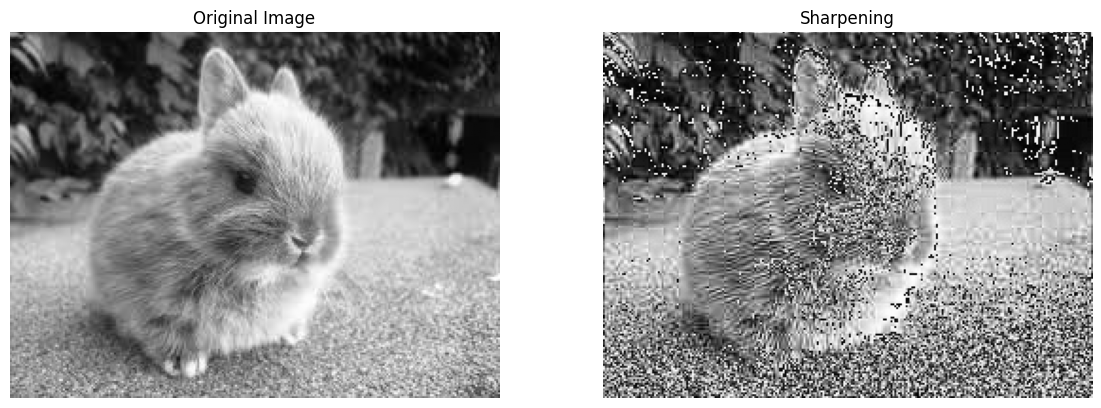

In [13]:
# Задаем изображение
plt.figure(figsize=(12, 8))

# Исходное изображение
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(rabbit, cmap='gray')
plt.axis('off')

# Резкость
plt.subplot(2, 2, 2)
plt.title("Sharpening")
plt.imshow(sharpen_rabbits[9], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# применяем convolve к котикам
sharpen_cats = []
for cat_array in cat_arrays:
  sharpen_cats.append(convolve(cat_array, kernel_sharpen, mode='constant', cval=0.0))

И котика жмыхнуло

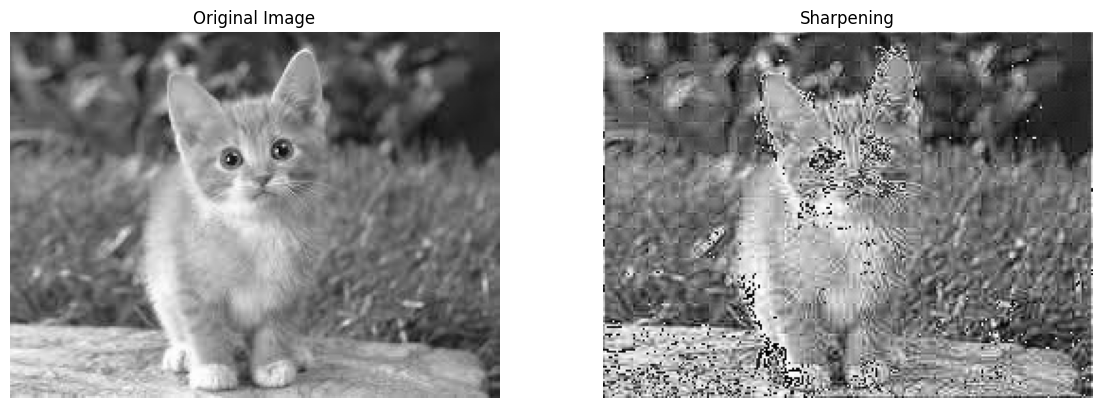

In [15]:
# Задаем изображение
plt.figure(figsize=(12, 8))

# Исходное изображение
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(cat, cmap='gray')
plt.axis('off')

# Резкость
plt.subplot(2, 2, 2)
plt.title("Sharpening")
plt.imshow(sharpen_cats[9], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Обучаю модель

In [42]:
# раздали им ярлычки и объединили для удобства
labels_cats = [0] * 10
labels_rabbits = [1] * 10
sharpen_animals = sharpen_cats + sharpen_rabbits
labels_animals = labels_cats + labels_rabbits

Тут я поняла, что просто соединить массивы в список не сработает

In [17]:
# Находим максимальные размеры
max_shape = tuple(max(s) for s in zip(*[arr.shape for arr in sharpen_animals]))

In [18]:
# так вот что такое и зачем паддинг. подгоняет размеры массивов под самый большой, заполняя нулями
padded_animals = [np.pad(arr, ((0, max_shape[0] - arr.shape[0]), (0, max_shape[1] - arr.shape[1])), mode='constant') for arr in sharpen_animals]
combined_animals = np.array(padded_animals)

In [19]:
# а тут и так сработает
labels_animals = np.array(labels_animals)

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import sklearn as sklearn
x = combined_animals
y = labels_animals

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)
x_train, x_temp, y_train, y_temp = sklearn.model_selection.train_test_split(x, y, train_size= 0.70, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = sklearn.model_selection.train_test_split(x_temp, y_temp, test_size= 0.5, random_state=42, shuffle=True)

In [21]:
# преверяю размеры выборок и матриц
print(f'Обучающая выборка: {x_train.shape}, {y_train.shape}')
print(f'Валидационная выборка: {x_val.shape}, {y_val.shape}')
print(f'Тестовая выборка: {x_test.shape}, {y_test.shape}')

Обучающая выборка: (14, 194, 259), (14,)
Валидационная выборка: (3, 194, 259), (3,)
Тестовая выборка: (3, 194, 259), (3,)


In [22]:
# Препроцессинг
# Регуляризация значений в диапазоне [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [23]:
# reshape изменяет размер входной матрицы под требования модели, при этом не изменяя данные
x_train = x_train.reshape(-1, 259, 194, 1)
x_test = x_test.reshape(-1, 259, 194, 1)

In [31]:
model = models.Sequential([

    layers.Input(shape=(259, 194, 1)),
    
    # Первый сверточный слой
    layers.Conv2D(32, (3, 3), activation='relu'),

    # Окном 2х2 походимся и вытаскивает максимальные значения
    layers.MaxPooling2D((2, 2)),

    # Второй сверточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Схлопываем тензор в вектор
    layers.Flatten(),

    # Dense это полносвязные слои, тут входной и выходной
    # Почему здесь мы используем 2 функции активации?
    layers.Dense(128, activation='relu'), # Одна во входном слое, приравнивает мелкие значения к нулю
    layers.Dense(2, activation='softmax')  # Выходной слой, преобразует значения в вероятности, 10 нейронов, по нейрону
    # на вариант значений (цифры 0-9)
])


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 257, 192, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 96, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 94, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 189504)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    24,256,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,275,714 (92.60 MB)

 Trainable params: 24,275,714 (92.60 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Собираем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Обучаем модель
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5714 - loss: 0.6905 - val_accuracy: 0.3333 - val_loss: 27.1077
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.5714 - loss: 17.6626 - val_accuracy: 0.6667 - val_loss: 1.3689
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.4286 - loss: 2.2171 - val_accuracy: 1.0000 - val_loss: 0.5151
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9286 - loss: 0.3039 - val_accuracy: 0.3333 - val_loss: 3.3306
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.5714 - loss: 1.9241 - val_accuracy: 0.3333 - val_loss: 1.3135


1/1 - 0s - 42ms/step - accuracy: 0.3333 - loss: 1.3135
Test accuracy: 0.3333


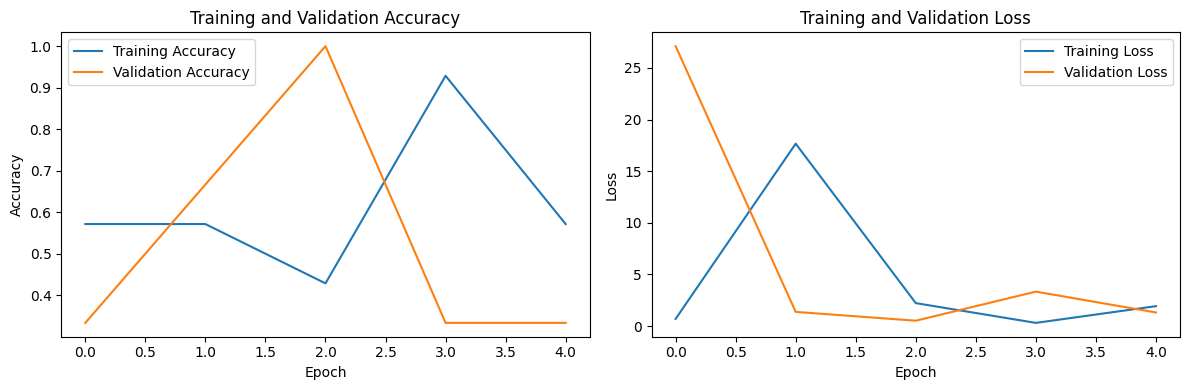

In [35]:
# Оцениваем модель
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Отрисовка графика прогресса обучения
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Ну будто бы loss нормальный, а training accuracy смешная. Ну ладно, все равно протестируем

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

# Подгружаем тестовое изображение
image = Image.open("D:/Convet/Rabbits/images.jpg").convert("L")  # Режим "L" преобразовывает изображение к виду оттенков серого
image = np.resize(image, (259,194)) # изменение размера изображения
image = np.array(image)  # Создаем числовое представление изображения

In [50]:
# нормализация
image = image / 255.0
image = image.reshape(-1, 259, 194, 1)
# Получение предсказаний
predictions = model.predict(image)

# argmax выводит эти нечеловекочитаемые векторы на плоскость и выбрает ближайший к 1 (тот, что с наибольшей вероятностью)
predicted_class = np.argmax(predictions, axis=1)

print(f"Предсказанный класс: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Предсказанный класс: 1


Класс, он говорит, что это кролик (1), хотя это котик. На кролика показал тоже 1. Всегда 1 предсказывает что ли? Я не знаю...
Даже на изображение кота из обучащей выборки поставил 1...

In [53]:
model.save('catsvsrabbits.keras')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=catsvsrabbits.keras/Convet/D.